# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


# Kevin Zhang

Data Science Spring 2017

2/2/2017


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

## Examples

One more time, I'll load the data from the NSFG.

In [2]:
live, firsts, others = first.MakeFrames()

And compute the distribution of birth weight for first babies and others.

In [3]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


We can plot the PMFs on the same scale, but it is hard to see if there is a difference.

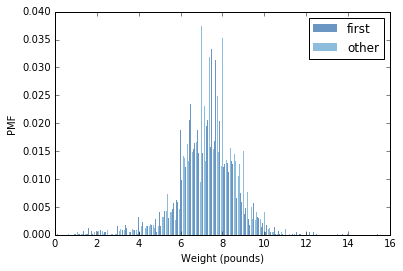

In [4]:
width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

`PercentileRank` computes the fraction of `scores` less than or equal to `your_score`.

In [5]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

If this is the list of scores.

In [6]:
t = [55, 66, 77, 88, 99]

And you got the 88, your percentile rank is 80.

In [7]:
PercentileRank(t, 88)

80.0

`Percentile` takes a percentile rank and computes the corresponding percentile. 

In [8]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

The median is the 50th percentile, which is 77.

In [9]:
Percentile(t, 50)

77

Here's a more efficient way to compute percentiles.

In [10]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

Let's hope we get the same answer.

In [11]:
Percentile2(t, 50)

77

The Cumulative Distribution Function (CDF) is almost the same as `PercentileRank`.  The only difference is that the result is 0-1 instead of 0-100.

In [12]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

In this list

In [13]:
t = [1, 2, 2, 3, 5]

We can evaluate the CDF for various values:

In [14]:
EvalCdf(t, 0), EvalCdf(t, 1), EvalCdf(t, 2), EvalCdf(t, 3), EvalCdf(t, 4), EvalCdf(t, 5)

(0.0, 0.2, 0.6, 0.8, 0.8, 1.0)

Here's an example using real data, the distribution of pregnancy length for live births.

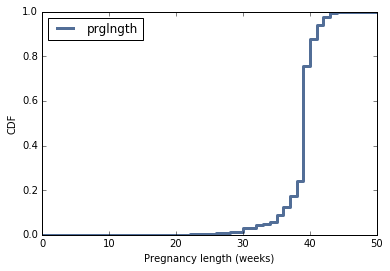

In [15]:
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='CDF', loc='upper left')

`Cdf` provides `Prob`, which evaluates the CDF; that is, it computes the fraction of values less than or equal to the given value.  For example, 94% of pregnancy lengths are less than or equal to 41.

In [16]:
cdf.Prob(41)

0.94064276344556186

`Value` evaluates the inverse CDF; given a fraction, it computes the corresponding value.  For example, the median is the value that corresponds to 0.5.

In [17]:
cdf.Value(0.5)

39

In general, CDFs are a good way to visualize distributions.  They are not as noisy as PMFs, and if you plot several CDFs on the same axes, any differences between them are apparent.

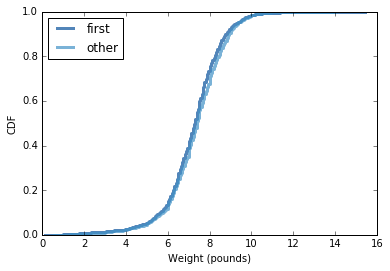

In [36]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In this example, we can see that first babies are slightly, but consistently, lighter than others.

We can use the CDF of birth weight to compute percentile-based statistics.

In [19]:
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')

Again, the median is the 50th percentile.

In [20]:
median = live_cdf.Percentile(50)
median

7.375

The interquartile range is the interval from the 25th to 75th percentile.

In [21]:
iqr = (live_cdf.Percentile(25), live_cdf.Percentile(75))
iqr

(6.5, 8.125)

We can use the CDF to look up the percentile rank of a particular value.  For example, my second daughter was 10.2 pounds at birth, which is near the 99th percentile.

In [25]:
print(live_cdf.PercentileRank(10.2))

98.8271741536


If we draw a random sample from the observed weights and map each weigh to its percentile rank.

In [26]:
sample = np.random.choice(weights, 100, replace=True)
ranks = [live_cdf.PercentileRank(x) for x in sample]

The resulting list of ranks should be approximately uniform from 0-1.

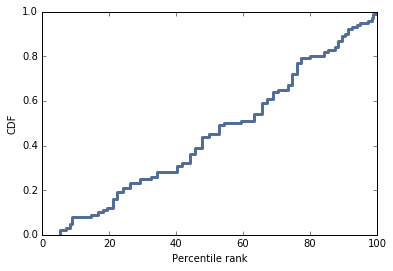

In [27]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel='Percentile rank', ylabel='CDF')

That observation is the basis of `Cdf.Sample`, which generates a random sample from a Cdf.  Here's an example.

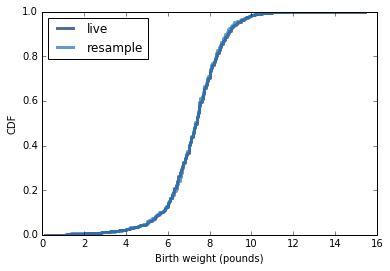

In [28]:
resample = live_cdf.Sample(1000)
thinkplot.Cdf(live_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='CDF')

This confirms that the random sample has the same distribution as the original data.

## Exercises

**Exercise:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

79.895994689090514

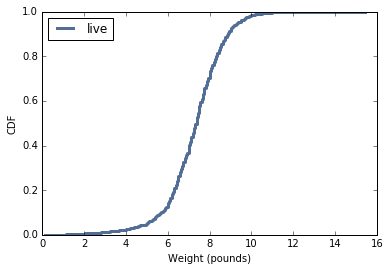

In [43]:
# Solution goes here

#The solution to the first part of this exercise that looks at all live births seems incorrect, since it uses cdf,
#which above is defined as the preg length of the babies, which is why the percentile rank of 8.5 is so small.
#For this solution I used live birth cdf and others birth cdf, which I interpret as the real intent of this problem.\

my_wgt = 8.3125
live_wgt = live.totalwgt_lb
live_wgt_dropna = live_wgt.dropna()
live_wgt_cdf = thinkstats2.Cdf(live_wgt_dropna, label='live')

thinkplot.Cdf(live_wgt_cdf)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')


live_wgt_cdf.PercentileRank(my_wgt)


78.096256684491976

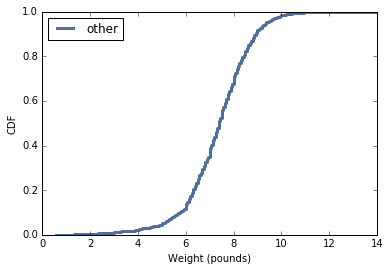

In [49]:
# Solution goes here

#As can be seen by the percentiles, I do not need to apologize to my mother, although I was on the heavier side
#In addition, when comparing the percentile ranks in the live pool and the other pool, it seems that the live
#one was higher; this is most likely due to the fact that above it was shown that the first babies are lighter
#on average, thus when taken out the distribution for the others is a bit heavier, and my percentile, which is
#still the same, moves down a bit.

other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
other_wgt_cdf = thinkstats2.Cdf(other_wgt_dropna, label='other')

thinkplot.Cdf(other_wgt_cdf)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')


other_wgt_cdf.PercentileRank(my_wgt)

**Exercise:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [56]:
# Solution goes here
rand_list = np.random.random(1000)


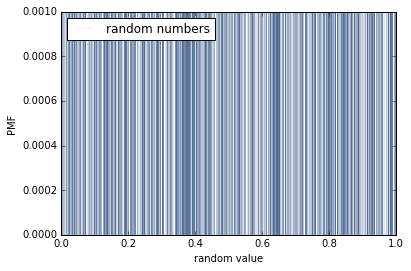

In [57]:
# Solution goes here

#the graph is crazy and makes no sense. I would say this is because the sample size isn't large enough, and we weren't
#able to get every number. Since only 1000 numbers were chosen, and there's a super low probability that the same 
#exact number is chosen again, each of the numbers present in the list have a probability of .001, as shown in the 
#graph. But then every other number that wasn't chosen isn't there, so they all have a probability of 0. This dichotomy
#of .001 and 0 is what makes the graph look crazy, because it's constantly oscillating between .001 and 0.

rand_pmf = thinkstats2.Pmf(rand_list, label="random numbers")

thinkplot.Pmf(rand_pmf, linewidth=0.1)
thinkplot.Config(xlabel="random value", ylabel="PMF")

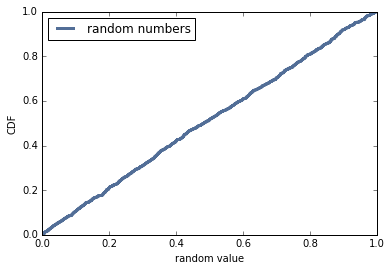

In [54]:
# Solution goes here

#based on the CDF, the distribution is indeed uniform, since the graph is a straight line that steadily goes up 
#at a slope of "1". This makes sense because while the Pmf tries to show equal probaility but fails because it's
#looking at each individual value, the Cdf looks at the cumulative probability, which will still hold true for the
#uniform probability map of numpy.random.random.

rand_cdf = thinkstats2.Cdf(rand_pmf)
thinkplot.Cdf(rand_cdf)
thinkplot.Config(xlabel='random value', ylabel='CDF')